<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-dataset..." data-toc-modified-id="The-dataset...-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The dataset...</a></span></li><li><span><a href="#Import-required-modules" data-toc-modified-id="Import-required-modules-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import required modules</a></span></li><li><span><a href="#Webscraping-and-APIs..." data-toc-modified-id="Webscraping-and-APIs...-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Webscraping and APIs...</a></span></li><li><span><a href="#Retrieval---Womens-Super-League" data-toc-modified-id="Retrieval---Womens-Super-League-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Retrieval - Womens Super League</a></span><ul class="toc-item"><li><span><a href="#NewsAPI---initialisation" data-toc-modified-id="NewsAPI---initialisation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>NewsAPI - initialisation</a></span></li><li><span><a href="#Grab-your-API-key" data-toc-modified-id="Grab-your-API-key-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Grab your API key</a></span></li><li><span><a href="#get_everything()-method" data-toc-modified-id="get_everything()-method-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>get_everything() method</a></span></li><li><span><a href="#Results---JSON-object" data-toc-modified-id="Results---JSON-object-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Results - JSON object</a></span></li><li><span><a href="#Building-a-pandas-DataFrame" data-toc-modified-id="Building-a-pandas-DataFrame-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Building a pandas DataFrame</a></span></li></ul></li><li><span><a href="#Webscraping" data-toc-modified-id="Webscraping-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Webscraping</a></span></li><li><span><a href="#RegEx" data-toc-modified-id="RegEx-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>RegEx</a></span><ul class="toc-item"><li><span><a href="#Date" data-toc-modified-id="Date-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Date</a></span></li><li><span><a href="#Quotes" data-toc-modified-id="Quotes-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Quotes</a></span></li></ul></li><li><span><a href="#Retrieval---Mens-Premier-League" data-toc-modified-id="Retrieval---Mens-Premier-League-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Retrieval - Mens Premier League</a></span></li><li><span><a href="#Save-to-CSV-file" data-toc-modified-id="Save-to-CSV-file-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Save to CSV file</a></span></li></ul></div>

In [1]:
# API key = cd716c442d1f48408aafb24eca509e2f

## The dataset...

In this notebook, we won't be working with a pre-existing dataset, we'll be building one ourselves! We will be using an API and some webscraping to create a pandas DataFrame containing our online articles, and the text content that we wish to do some text-mining with. If that sounds weird, fear not, I'll explain as we go along.

Below I've commented out some code that I no longer need, as I have already installed these packages.
Go ahead and uncomment this code and make sure you install each one before you begin.

In [2]:

# !pip install pandas
# !pip install newsapi-python
# !pip install datetime
# !pip install requests
# !pip install bs4

## Import required modules

The first package 'newsapi' requires you to go to the following link https://newsapi.org/ and create a free account. You can then generate your API key, which you will need to locate your news articles.

In [3]:
import nltk
from nltk import word_tokenize
 # nltk stands for natural language tool kit and is useful for text-mining

from newsapi import NewsApiClient
# NewsAPI package allows us to use their API which returns search results for news articles

import pandas as pd
# includes useful functions for manipulating data 

import re
# re is for regular expressions, which we use later 

import datetime as dt
# supplies classes for manipulating dates and times

import requests
# allows us to send HTTP requests using Python - we will need this for webscraping!

from bs4 import BeautifulSoup
# contains functions that help us pull content from webpages and save that info into something more readable
# ...again, important for webscraping!

## Webscraping and APIs...

Webscraping refers to the extraction of data from a website. This information is collected and then exported into a format that is more useful, perhaps a spreadsheet. Of course, we could just copy and paste this information manually into a spreadsheet, but that's time-consuming and unreasonable if we want to extract large amounts of data. Instead, we can use Python webscraping packages to access the information we want and display it in a logical format.

API stands for 'Application programming interface', and refers to a mechanism that allows two software components to communicate with each other using a set of definitions and protocals. Basically, it allows two applications to talk to each other. For instance, think of your Weather app on your phone, this app software "talks" to the weather bureau's software system which contains the daily weather data. The result of this conversation is daily weather updates on your phone. 

Both webscraping (as a process) and APIs (as a set of procedures and protocals) share the same goal: to access web data. The former allows you to extract data from any website via scraping software, whilst the latter gives you direct access to the data you want. In this notebook I'll be using a combination of the two.

## Retrieval - Womens Super League

Text-Mining has four basic steps: retrieval, processing, extraction, and analysis. 
During the retrieval stage we retrieve information, i.e., we gather the text data that we wish to work with. In this case, we're looking for articles that focus on women's football, and in particular, the WSL (Women's Super League). I'd also like to build up a dataset which focuses on men's football too, which looks at the Premier League. 

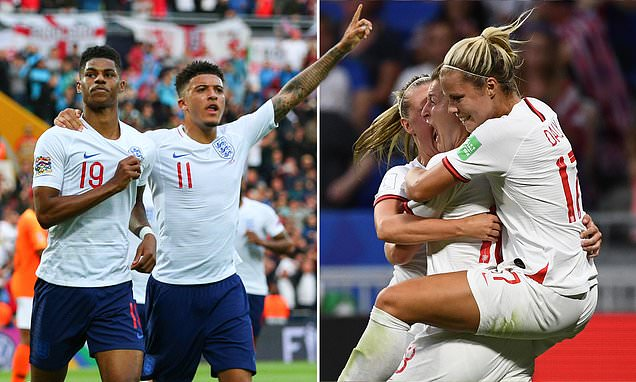

### NewsAPI - initialisation

So before I can even begin to think about webscraping, I need to locate some relevant data. I could just type "women's football WSL" into google and click on each individual link and try to scrape this data... but again, that's a) time-consuming b) uncreative. Instead, I did a brief google search "Scrape news articles Python" and came across NewsAPI. This API returns search results for current and historic news articles, and the results include information on: title, author, source, date, and url of the news article. It also allows you to input multiple terms so that you can grab as many relevant links as you can! 

Neat. Let's get started then.

### Grab your API key

In the section under 'Import required modules' I mentioned that you'll need to visit this link  https://newsapi.org/ and create a free account. So if you haven't done so, do it now! You can then generate your API key, which you will need to locate your news articles.

In [4]:
# Initialise the client class with your API key:

newsapi = NewsApiClient(api_key='cd716c442d1f48408aafb24eca509e2f')

In [5]:
# Here, I print the instance of my NewsApiClient class... it has 3 methods:
# get_top_headlines(), get_everything(), and get_sources()

newsapi

### get_everything() method

Because we don't want our search results restricted to the top headlines, we will be using the get_everything() method. 

The get_everything() method has the following parameters:

* apiKey (required)
* q - keywords or phrases to search for in the article title and body. Supports advanced search e.g. you can use the AND / OR / NOT keywords 
* sources - if you want to specify which news sources or blogs you want headlines from e.g. bbc
* from - a date and optional time for the oldest article allowed
* to - a date and optional time for the newest article allowed
* language - the language you want your articles in
* sortBy - defines how your results are returned, options include 'relevancy' so that articles most closely related to 'q' come first

NOTE: Unfortunately in the free version of the NewsAPI I can't restrict by date. So I can only pull articles from 31st October. I would have liked to specify a timeframe for women's football that corresponded to last years WSL, and the same for the men's premier league. Alas, we march onwards. 

In [6]:
# Create a variable called 'womens'
# Use get_everything() method with my topic set to include the "womens super league" and the "WSL"...
# helps to capture results that use the abbrieviation 

womens = newsapi.get_everything(q = "women super league AND WSL", language = 'en')

### Results - JSON object

Below I have printed the result for my get_everything() search, and I know what you're thinking.. ew, gross! Yep, we have a dictionary result for each article which contains the title, author, source, date of publish, and the url. But, this format isn't the best. Dictionarys are made up of key/value pairs, so what we can do is extract the relevant information and then place it into a DataFrame.

We probably want the keys as column headings and our values inserted in the rows.
 

In [7]:
# Let's take a look at our results...

womens

{'status': 'ok',
 'totalResults': 0,
 'articles': [{'title': 'Women’s Super League: talking points from the weekend’s action',
   'author': 'Suzanne Wrack, Sophie Downey and Sarah Rendell',
   'source': {'Id': None, 'Name': 'The Guardian'},
   'publishedAt': '2022-11-21T12:01:31Z',
   'url': 'https://www.theguardian.com/football/2022/nov/21/womens-super-league-talking-points-from-the-weekends-action'},
  {'title': 'Moving the Goalposts | ‘We want to keep dreaming’ – the rise and rise of Roma Women',
   'author': 'Sophie Downey',
   'source': {'Id': None, 'Name': 'The Guardian'},
   'publishedAt': '2022-12-07T11:45:23Z',
   'url': 'https://www.theguardian.com/football/2022/dec/07/we-want-to-keep-dreaming-the-rise-and-rise-of-roma-women'},
  {'title': 'Leicester’s Ashleigh Plumptre: ‘I love everything about being in Nigeria’',
   'author': 'Ella Braidwood',
   'source': {'Id': None, 'Name': 'The Guardian'},
   'publishedAt': '2022-11-17T11:33:58Z',
   'url': 'https://www.theguardian.com/

In [8]:
# I have created 5 empty lists for our dictionary keys

headlines = []
author = []
source = []
date = []
url = []

# first I will use a for loop to interate over the 'articles' list which contains the relevant dictionary
# the get() method returns the value of the item with the specified key
for i in womens.get("articles"):
#  then I access the "title" key using get() and append the value to the empty headlines list   
    headlines.append(i.get("title"))
#     repeat for author, date, and url
    author.append(i.get("author"))
#    source contains another dictionary which includes 'Id' and 'Name'
# here we just want 'Name', so first we access the source key and name this variable 'source_dict'
    source_dict = (i.get("source"))
#     then we enter our source dictionary and access the 'Name' value for each article
    source.append(source_dict.get("Name"))
    date.append(i.get("publishedAt"))
    url.append(i.get("url"))

# Let's take a look at our url list

url

# Nice, looking good. Let's see if we can get all of our list info into a snazzy looking DataFrame. 

['https://www.theguardian.com/football/2022/nov/21/womens-super-league-talking-points-from-the-weekends-action',
 'https://www.theguardian.com/football/2022/dec/07/we-want-to-keep-dreaming-the-rise-and-rise-of-roma-women',
 'https://www.theguardian.com/football/2022/nov/17/leicester-ashleigh-plumptre-nigeria',
 'https://www.bbc.co.uk/sport/football/63771047',
 'https://www.bbc.co.uk/sport/football/63606404',
 'https://www.bbc.co.uk/sport/football/63849450',
 'https://www.bbc.co.uk/sport/football/63612799',
 'https://www.bbc.co.uk/sport/football/63765147',
 'https://www.bbc.co.uk/sport/football/63849444',
 'https://www.bbc.co.uk/sport/football/63697262',
 'https://www.bbc.co.uk/sport/football/63849448',
 'https://www.bbc.co.uk/sport/football/63606405',
 'https://www.bbc.co.uk/sport/football/63765142',
 'https://www.bbc.co.uk/sport/football/63849447',
 'https://www.skysports.com/football/news/35730/12746755/polly-bancroft-exclusive-manchester-united-women-ahead-of-curve-with-new-head-of-

### Building a pandas DataFrame

Below, we have used the lists we created by iterating over the 'womens' dictionary, to build our DataFrame. But, you'll notice some things that you might want to change, for instance the 'Date' column isn't in the best format. This is an issue we can tackle in the next stage of our text-mining process: processing.

In [9]:
# First, let's create a dictionary called 'd'
# In it we'll place our column names and their corresponding lists that we built in the previous cell

d = {'Headlines': headlines, 'Source': source, 'Author': author, 'Date': date, 'Link': url}

# Next, we create a DataFrame object called 'df' and in the 'data' parameter set it to our dictionary 'd'
df = pd.DataFrame(data=d)

# Let's go ahead and view the results
df.head()
# the head() method prints the first 5 rows of our dataframe

,Headlines,Source,Author,Date,Link
0,Women’s Super League: talking points from the ...,The Guardian,"Suzanne Wrack, Sophie Downey and Sarah Rendell",2022-11-21T12:01:31Z,https://www.theguardian.com/football/2022/nov/...
1,Moving the Goalposts | ‘We want to keep dreami...,The Guardian,Sophie Downey,2022-12-07T11:45:23Z,https://www.theguardian.com/football/2022/dec/...
2,Leicester’s Ashleigh Plumptre: ‘I love everyth...,The Guardian,Ella Braidwood,2022-11-17T11:33:58Z,https://www.theguardian.com/football/2022/nov/...
3,Man City win keeps pressure on WSL top three,BBC News,None,2022-12-04T16:12:15Z,https://www.bbc.co.uk/sport/football/63771047
4,Shaw stars for Man City in WSL win at Everton,BBC News,None,2022-11-19T17:01:41Z,https://www.bbc.co.uk/sport/football/63606404


## Webscraping

Now that we have some links that are relevant to our topic of focus the 'women's super league', we can start to scrape the text content of these articles! We will do so with the requests package (which allows us to send HTTP requests using Python), and the BeautifulSoup package (which helps us pull data out of HTML files).

**NOTE: GOOGLE IS YOUR FRIEND**

Like all good computational social science folk, I know that I don't need to be an expert in everything. In fact, a good skill to build when you're doing computational work, is effective googling. I could claim that I built all of this code alone with my own knowledge + cleverness, but that would be a lie! Instead, like most projects, this has been a learning experience and I have incorporated useful bits of code to help get the job done. The function outlined below was found on the following stackoverflow forum (https://stackoverflow.com/questions/70753206/download-and-extract-only-news-from-bbc) and was the result of a google search ("Python scrape news articles BBC") - at the time I thought I might limit my results to just BBC articles.

I took some time to get to grips with it, and then tweaked it to fit my text-mining purposes! 

In [10]:

# create empty list which will hold the text content of each article
text = []

# create function which has a parameter for our urls
def get_page(urls):

#   first I make a requests.get response for each url
# this returns a requests.Response() object which contains the servers response to the HTTP request
    response = requests.get(urls)


#   we then run the response.text from the request through Beautiful Soup which gives us a BeautifulSoup object
# this represents the document as a nested data structure 
# we use the features parameter to choose how to parse the HTML - I'm using 'lxml'
    soup = BeautifulSoup(response.text, features='lxml')
    

# we create an empty list called 'blocks' which will hold our blocks of text
    blocks = []
#     for block in soup.find_all('div', {"data-component": "text-block"}) or soup.find_all('div', {"class": "body-text-card b-reith-sans-font"}) or soup.find_all('div', {"class": "ssrcss-1n5sg88-StyledSummary elwf6ac3"}) or soup.find_all('h3', {"class": "lx-stream-post__header-title gel-great-primer-bold qa-post-title gs-u-mt0 gs-u-mb-"}):

# for now I'm just going to use the soup.find_all() method to find every instance of my desired HTML tag
# the below code will ensure each <p> paragraph is appended to my blocks list
    for block in soup.find_all('p'):
        blocks.append(block.getText())
    

# I then exit the for loop and append all of the paragraphs found in the given url to my empty 'text' list
    text.append(blocks)

# I then return the text list so that we can access the contents of each url!
    return text

In [11]:
# To scrape the contents of each webpage in my url list, I will iterate through the urls with a for loop

for i in url:
#     the variable 'text' contains the text list that is returned from the get_page() function
    womens_text = get_page(i)

In [12]:
womens_text

[['Arsenal’s winning run was ended in dramatic style at the Emirates while Brighton and Liverpool also produced a thriller',
  'Manchester United’s second win against one of Arsenal, Chelsea and Manchester City, and first away win against any of the traditional top three, was significant. The 3-2 defeat of Arsenal at the Emirates spoke to a real shift in the resilience of Marc Skinner’s side. Having taken the lead, United’s collapse early in the second half, conceding twice, looked to be following a familiar pattern. Instead, in front of an impressive away end, United roared back to equalise and then win it in injury time. Skinner called it a full Manchester United performance. “Our job is to bring the women under that same banner of: we might go down but we’re never beaten,” he said. They were helped by some poor defending for Katie Zelem’s lethal set-pieces, which provided goals two and three, but there is little doubt that United, after a bruising 3-1 defeat to Chelsea, are serious 

In [13]:
# the .join() method returns a string by joining all the elements of a list separated by ""
# I have done this to ensure the rows in the 'content' column aren't enclosed by square brackets
# This makes it easier to extract RegEx patterns... more on this shortly!
womens_text = ["".join(i) for i in womens_text]

In [14]:
# I create a new column labelled 'Content' and assign each text string to a row
df['Content'] = womens_text

In [15]:
# Let's use the .head() method to see if the above has worked...
df.head()

# Nice!

,Headlines,Source,Author,Date,Link,Content
0,Women’s Super League: talking points from the ...,The Guardian,"Suzanne Wrack, Sophie Downey and Sarah Rendell",2022-11-21T12:01:31Z,https://www.theguardian.com/football/2022/nov/...,Arsenal’s winning run was ended in dramatic st...
1,Moving the Goalposts | ‘We want to keep dreami...,The Guardian,Sophie Downey,2022-12-07T11:45:23Z,https://www.theguardian.com/football/2022/dec/...,Club has soared since acquiring the Serie A li...
2,Leicester’s Ashleigh Plumptre: ‘I love everyth...,The Guardian,Ella Braidwood,2022-11-17T11:33:58Z,https://www.theguardian.com/football/2022/nov/...,The defender on playing for the club in her he...
3,Man City win keeps pressure on WSL top three,BBC News,None,2022-12-04T16:12:15Z,https://www.bbc.co.uk/sport/football/63771047,Last updated on 4 December 20224 December 2022...
4,Shaw stars for Man City in WSL win at Everton,BBC News,None,2022-11-19T17:01:41Z,https://www.bbc.co.uk/sport/football/63606404,Last updated on 19 November 202219 November 20...


## RegEx

We can extract the text we want and place it into a column, by using something called RegEx. This stands for 'regular expression', and it denotes a sequence of characters that specifies a search pattern in text. 

When first approaching regular expressions, it will seem as if it's a completely different language. But, with enough practice, and with a strong grasp of the basics under your belt, you'll be able to incorporate this method into your text-mining endeavours. 

I'm not going to go through everything here, but I will include some resources below which will aid in your understanding of this topic. 

* https://www.computerhope.com/jargon/r/regex.htm - the lowdown on RegEx
* https://regex101.com/ - useful if you want to test your RegEx patterns

TLDR: RegEx are a set of characters which are used to create patterns. We can use these patterns to search, find, replace, or validate text.

### Date

In [16]:
# First I want to clean up my Date column 
# I want to overwrite my old 'Date' column with the relevant information that I extract from the rows
# str.extract() is a pandas function that we can use to extract groups in the RegEx pattern

# Understanding the RegEx pattern:
# r' - denotes the start of a regular expression
# () - brackets denotes a capturing group
# d{4} - denotes 4 digits - as we are looking for a year of birth
# d{2} - denotes 2 digits - for month and day


df['Date'] = df['Date'].str.extract(r'(\d{4}-\d{2}-\d{2})')
df.head()

,Headlines,Source,Author,Date,Link,Content
0,Women’s Super League: talking points from the ...,The Guardian,"Suzanne Wrack, Sophie Downey and Sarah Rendell",2022-11-21,https://www.theguardian.com/football/2022/nov/...,Arsenal’s winning run was ended in dramatic st...
1,Moving the Goalposts | ‘We want to keep dreami...,The Guardian,Sophie Downey,2022-12-07,https://www.theguardian.com/football/2022/dec/...,Club has soared since acquiring the Serie A li...
2,Leicester’s Ashleigh Plumptre: ‘I love everyth...,The Guardian,Ella Braidwood,2022-11-17,https://www.theguardian.com/football/2022/nov/...,The defender on playing for the club in her he...
3,Man City win keeps pressure on WSL top three,BBC News,None,2022-12-04,https://www.bbc.co.uk/sport/football/63771047,Last updated on 4 December 20224 December 2022...
4,Shaw stars for Man City in WSL win at Everton,BBC News,None,2022-11-19,https://www.bbc.co.uk/sport/football/63606404,Last updated on 19 November 202219 November 20...


### Quotes

I'd also like to extract any quotes from each article and place them in their own column named (you guessed it) 'Quotes'.

In [17]:
# First I create a new column named 'Quotes'
# Then I use the str.findall() method to find each string that matches my RegEx pattern

df['Quotes'] = df['Content'].str.findall(r'"([^"]*)"')


In [18]:
df.Quotes[20]

["At the moment I got the Golden Glove, we figured out we hadn't won the title. How would you celebrate?",
 "It may be my name underneath it, but for me, it's totally a team achievement. It's how they put their bodies between the ball and the goal to defend as a unit and as Arsenal, you can see the passion.",
 'Of course, I want to keep the clean sheet as often as possible. But we are there to win the big trophies and the little ones, they are part of the personality of the club as well. But we want to win the big ones and if we add on the little ones, we nailed it.',
 "It's an incredible team achievement,",
 'Everyone thinks about scoring goals, but first of all, keep the zero, be compact.',
 "How we defend on the pitch is like putting our passion in it and how we score, there are so many different ones. It's not only one [scorer], it's the team and that's what I love to see. We score as a team and we defend as a team.",
 "But before that, we are putting everything in for Arsenal and 

In [19]:
# df['She_said'] = df['Content'].str.extract(r'([^.]* she said|says [^.]*\.)')

## Retrieval - Mens Premier League

Now, let's build up a dataset of articles which focus on the mens premier league. This will involve following the same steps above, but simply changing my 'q' topic when using the NewsAPI.

In [20]:
mens = newsapi.get_everything(q = "premier league football", language = 'en')

In [21]:
mens

{'status': 'ok',
 'totalResults': 0,
 'articles': [{'title': 'Fulham v Manchester United: Premier League – live',
   'author': 'Alex Hess',
   'source': {'Id': None, 'Name': 'The Guardian'},
   'publishedAt': '2022-11-13T15:47:29Z',
   'url': 'https://www.theguardian.com/football/live/2022/nov/13/fulham-v-manchester-united-premier-league-live'},
  {'title': 'American businessman Foley completes takeover of Bournemouth - Reuters',
   'author': None,
   'source': {'Id': 'reuters', 'Name': 'Reuters'},
   'publishedAt': '2022-12-13T12:41:00Z',
   'url': 'https://www.reuters.com/lifestyle/sports/american-businessman-foley-completes-takeover-bournemouth-2022-12-13/'},
  {'title': 'Brighton v Aston Villa: Premier League – live',
   'author': 'Daniel Harris',
   'source': {'Id': None, 'Name': 'The Guardian'},
   'publishedAt': '2022-11-13T13:16:31Z',
   'url': 'https://www.theguardian.com/football/live/2022/nov/13/brighton-v-aston-villa-premier-league-live'},
  {'title': 'Edu promoted to Sport

In [22]:
# I have created 5 empty lists for our dictionary keys

headlines = []
author = []
source = []
date = []
url2 = []

# first I will use a for loop to interate over the 'articles' list which contains the relevant dictionary
# the get() method returns the value of the item with the specified key
for i in mens.get("articles"):
#  then I access the "title" key using get() and append the value to the empty headlines list   
    headlines.append(i.get("title"))
#     repeat for author, date, and url
    author.append(i.get("author"))
#    source contains another dictionary which includes 'Id' and 'Name'
# here we just want 'Name', so first we access the source key and name this variable 'source_dict'
    source_dict = (i.get("source"))
#     then we enter our source dictionary and access the 'Name' value for each article
    source.append(source_dict.get("Name"))
    date.append(i.get("publishedAt"))
    url2.append(i.get("url"))

# Let's take a look at our url list

url2

# Nice, looking good. Let's see if we can get all of our list info into a snazzy looking DataFrame. 

['https://www.theguardian.com/football/live/2022/nov/13/fulham-v-manchester-united-premier-league-live',
 'https://www.reuters.com/lifestyle/sports/american-businessman-foley-completes-takeover-bournemouth-2022-12-13/',
 'https://www.theguardian.com/football/live/2022/nov/13/brighton-v-aston-villa-premier-league-live',
 'https://www.reuters.com/lifestyle/sports/edu-promoted-sporting-director-arsenal-2022-11-18/',
 'https://www.theguardian.com/football/live/2022/nov/12/newcastle-united-v-chelsea-premier-league-live-score-updates',
 'https://www.theguardian.com/football/2022/nov/14/premier-league-season-so-far-best-signing-biggest-disappointment',
 'https://www.theguardian.com/football/2022/nov/14/premier-league-10-talking-points-from-the-weekends-action',
 'https://www.theguardian.com/football/2022/nov/15/fan-led-review-of-football-governance-still-waiting-for-liftoff-after-12-months',
 'https://www.reuters.com/lifestyle/sports/guardiola-extends-manchester-city-deal-2025-2022-11-23/',
 

In [23]:
# First, let's create a dictionary called 'd'
# In it we'll place our column names and their corresponding lists that we built in the previous cell

d2 = {'Headlines': headlines, 'Source': source, 'Author': author, 'Date': date, 'Link': url2}

# Next, we create a DataFrame object called 'df' and in the 'data' parameter set it to our dictionary 'd'
df2 = pd.DataFrame(data=d2)

# Let's go ahead and view the results
df2.head()
# the head() method prints the first 5 rows of our dataframe

,Headlines,Source,Author,Date,Link
0,Fulham v Manchester United: Premier League – live,The Guardian,Alex Hess,2022-11-13T15:47:29Z,https://www.theguardian.com/football/live/2022...
1,American businessman Foley completes takeover ...,Reuters,None,2022-12-13T12:41:00Z,https://www.reuters.com/lifestyle/sports/ameri...
2,Brighton v Aston Villa: Premier League – live,The Guardian,Daniel Harris,2022-11-13T13:16:31Z,https://www.theguardian.com/football/live/2022...
3,Edu promoted to Sporting Director at Arsenal -...,Reuters,None,2022-11-18T16:42:00Z,https://www.reuters.com/lifestyle/sports/edu-p...
4,Newcastle United v Chelsea: Premier League – live,The Guardian,Will Magee,2022-11-12T17:26:17Z,https://www.theguardian.com/football/live/2022...


In [24]:
# To scrape the contents of each webpage in my url list, I will iterate through the urls with a for loop
text = []
for i in url2:
#     the variable 'text' contains the text list that is returned from the get_page() function
    mens_text = get_page(i)

In [25]:
mens_text

[['Alejandro Garnacho broke Fulham hearts with a last-gasp winner at Craven Cottage',
  'Here’s our report from Craven Cottage. And that’s all from me. Thanks for reading!',
  'And that’s that. At the end of a terrific, hard-fought game, Fulham taste defeat undeservedly but Garnacho has announced his arrival with a match-winning cameo. A terrifically well-worked goal, too, he and Eriksen staying ice-cool under pressure to slickly prise open Fulham’s backline.',
  'United win it in the last minute of added-time. Again United attack down the left, this time Eriksen charging forward and playing a one-two-three with Garnacho, who is suddenly through on goal. The Argentinian prods home an calm left-foot finish to decide the game!',
  '90 mins: Casemiro pokes the ball into the box, Ream flicks it on and Fernandes meets it at the back to to send a header across the face of goal. It’s begging for an attacker to tap it in, but there’s no one there and Fernandes appears to take that as a persona

In [26]:
# the .join() method returns a string by joining all the elements of a list separated by ""
# I have done this to ensure the rows in the 'content' column aren't enclosed by square brackets
# This makes it easier to extract RegEx patterns... more on this shortly!
mens_text = ["".join(i) for i in mens_text]

In [27]:
df2

,Headlines,Source,Author,Date,Link
0,Fulham v Manchester United: Premier League – live,The Guardian,Alex Hess,2022-11-13T15:47:29Z,https://www.theguardian.com/football/live/2022...
1,American businessman Foley completes takeover ...,Reuters,None,2022-12-13T12:41:00Z,https://www.reuters.com/lifestyle/sports/ameri...
2,Brighton v Aston Villa: Premier League – live,The Guardian,Daniel Harris,2022-11-13T13:16:31Z,https://www.theguardian.com/football/live/2022...
3,Edu promoted to Sporting Director at Arsenal -...,Reuters,None,2022-11-18T16:42:00Z,https://www.reuters.com/lifestyle/sports/edu-p...
4,Newcastle United v Chelsea: Premier League – live,The Guardian,Will Magee,2022-11-12T17:26:17Z,https://www.theguardian.com/football/live/2022...
...,...,...,...,...,...
92,TV tonight: Ruby Wax’s obsession with an aweso...,The Guardian,"Hollie Richardson, Sammy Gecsoyler, Graeme Vir...",2022-11-28T06:20:16Z,https://www.theguardian.com/tv-and-radio/2022/...
93,‘The defeats always stay’: Jordan Henderson re...,The Guardian,David Hytner in Doha,2022-12-02T22:30:27Z,https://www.theguardian.com/football/2022/dec/...
94,Cat-ar 2022: England players to adopt ‘Dave’ t...,The Guardian,Luke McLaughlin,2022-12-11T14:54:07Z,https://www.theguardian.com/football/2022/dec/...
95,‘I felt betrayed’: Ronaldo aims broadside at T...,The Guardian,PA Media,2022-11-13T22:46:08Z,https://www.theguardian.com/football/2022/nov/...


In [28]:
# I create a new column labelled 'Content' and assign each text string to a row
df2['Content'] = mens_text

In [29]:
df2.head()

,Headlines,Source,Author,Date,Link,Content
0,Fulham v Manchester United: Premier League – live,The Guardian,Alex Hess,2022-11-13T15:47:29Z,https://www.theguardian.com/football/live/2022...,Alejandro Garnacho broke Fulham hearts with a ...
1,American businessman Foley completes takeover ...,Reuters,None,2022-12-13T12:41:00Z,https://www.reuters.com/lifestyle/sports/ameri...,Dec 13 (Reuters) - Bournemouth have been taken...
2,Brighton v Aston Villa: Premier League – live,The Guardian,Daniel Harris,2022-11-13T13:16:31Z,https://www.theguardian.com/football/live/2022...,Villa survived the concession of a first-minut...
3,Edu promoted to Sporting Director at Arsenal -...,Reuters,None,2022-11-18T16:42:00Z,https://www.reuters.com/lifestyle/sports/edu-p...,Nov 18 (Reuters) - Edu has been appointed as A...
4,Newcastle United v Chelsea: Premier League – live,The Guardian,Will Magee,2022-11-12T17:26:17Z,https://www.theguardian.com/football/live/2022...,A second-half strike from Joe Willock was enou...


## Save to CSV file

In [34]:
df.to_csv('Data/Womens_dataset.csv')

In [35]:
df2.to_csv('Data/Mens_dataset.csv')